# Aggregations: Min, Max, and Everything In Between

Often when faced with a large amount of data, a first step is to compute summary statistics for the data in question.
Perhaps the most common summary statistics are the mean and standard deviation, which allow you to summarize the "typical" values in a dataset, but other aggregates are useful as well (the sum, product, median, minimum and maximum, quantiles, etc.).

NumPy has fast built-in aggregation functions for working on arrays; we'll discuss and demonstrate some of them here.

## Summing the Values in an Array

As a quick example, consider computing the sum of all values in an array.
Python itself can do this using the built-in ``sum`` function:

In [1]:
import numpy as np

In [3]:
L = np.random.random(100)
sum(L)

50.891629427690745

The syntax is quite similar to that of NumPy's ``sum`` function, and the result is the same in the simplest case:

In [4]:
np.sum(L)

50.89162942769075

However, because it executes the operation in compiled code, NumPy's version of the operation is computed much more quickly:

In [5]:
big_array = np.random.rand(1000000)
%timeit sum(big_array)
%timeit np.sum(big_array)

85.8 ms ± 750 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
340 µs ± 3.98 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


Be careful, though: the ``sum`` function and the ``np.sum`` function are not identical, which can sometimes lead to confusion!
In particular, their optional arguments have different meanings, and ``np.sum`` is aware of multiple array dimensions, as we will see in the following section.

## Minimum and Maximum

Similarly, Python has built-in ``min`` and ``max`` functions, used to find the minimum value and maximum value of any given array:

In [26]:
min(big_array), max(big_array)

(2.521464479432467e-07, 0.9999994045683972)

NumPy's corresponding functions have similar syntax, and again operate much more quickly:

In [6]:
np.min(big_array), np.max(big_array)

(8.453550116582775e-07, 0.9999996394742974)

In [7]:
%timeit min(big_array)
%timeit np.min(big_array)

68.2 ms ± 1.32 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
307 µs ± 9.46 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


For ``min``, ``max``, ``sum``, and several other NumPy aggregates, a shorter syntax is to use methods of the array object itself:

In [29]:
print(big_array.min(), big_array.max(), big_array.sum())

2.521464479432467e-07 0.9999994045683972 499741.5021740358


Whenever possible, make sure that you are using the NumPy version of these aggregates when operating on NumPy arrays!

### Multi dimensional aggregates

One common type of aggregation operation is an aggregate along a row or column.
Say you have some data stored in a two-dimensional array:

In [9]:
M = np.random.random((3, 4))
print(M)

[[0.52354097 0.41346833 0.37210882 0.39132246]
 [0.48091757 0.78226267 0.89300496 0.61954056]
 [0.68003412 0.40579211 0.92600888 0.87270371]]


By default, each NumPy aggregation function will return the aggregate over the entire array:

In [10]:
np.sum(M)

7.360705166596962

In [11]:
M.sum()

7.360705166596962

Aggregation functions take an additional argument specifying the *axis* along which the aggregate is computed. For example, we can find the minimum value within each column by specifying ``axis=0``:

In [12]:
M

array([[0.52354097, 0.41346833, 0.37210882, 0.39132246],
       [0.48091757, 0.78226267, 0.89300496, 0.61954056],
       [0.68003412, 0.40579211, 0.92600888, 0.87270371]])

In [13]:
M.min(axis=0)

array([0.48091757, 0.40579211, 0.37210882, 0.39132246])

The function returns four values, corresponding to the four columns of numbers.

Similarly, we can find the maximum value within each row:

In [33]:
M.max(axis=1)

array([0.94135617, 0.86669002, 0.7774729 ])

The way the axis is specified here can be confusing to users coming from other languages.
The ``axis`` keyword specifies the *dimension of the array that will be collapsed*, rather than the dimension that will be returned.
So specifying ``axis=0`` means that the first axis will be collapsed: for two-dimensional arrays, this means that values within each column will be aggregated.

### Other aggregation functions

NumPy provides many other aggregation functions, but we won't discuss them in detail here.
Additionally, most aggregates have a ``NaN``-safe counterpart that computes the result while ignoring missing values, which are marked by the special IEEE floating-point ``NaN`` value.
Some of these ``NaN``-safe functions were not added until NumPy 1.8, so they will not be available in older NumPy versions.

The following table provides a list of useful aggregation functions available in NumPy:

|Function Name      |   NaN-safe Version  | Description                                   |
|-------------------|---------------------|-----------------------------------------------|
| ``np.sum``        | ``np.nansum``       | Compute sum of elements                       |
| ``np.prod``       | ``np.nanprod``      | Compute product of elements                   |
| ``np.mean``       | ``np.nanmean``      | Compute mean of elements                      |
| ``np.std``        | ``np.nanstd``       | Compute standard deviation                    |
| ``np.var``        | ``np.nanvar``       | Compute variance                              |
| ``np.min``        | ``np.nanmin``       | Find minimum value                            |
| ``np.max``        | ``np.nanmax``       | Find maximum value                            |
| ``np.argmin``     | ``np.nanargmin``    | Find index of minimum value                   |
| ``np.argmax``     | ``np.nanargmax``    | Find index of maximum value                   |
| ``np.median``     | ``np.nanmedian``    | Compute median of elements                    |
| ``np.percentile`` | ``np.nanpercentile``| Compute rank-based statistics of elements     |
| ``np.any``        | N/A                 | Evaluate whether any elements are true        |
| ``np.all``        | N/A                 | Evaluate whether all elements are true        |


## Example: What is the Average Height of US Presidents?

Aggregates available in NumPy can be extremely useful for summarizing a set of values.
As a simple example, let's consider the heights of all US presidents.
This data is available in the file *president_heights.csv*, which is a simple comma-separated list of labels and values:

We'll use the Pandas package, which we'll explore more fully in later lectures to read the file and extract this information (note that the heights are measured in centimeters).

In [14]:
import pandas as pd
data = pd.read_csv('data/president_heights.csv')

In [15]:
data

,order,name,height(cm)
0,1,George Washington,189
1,2,John Adams,170
2,3,Thomas Jefferson,189
3,4,James Madison,163
4,5,James Monroe,183
5,6,John Quincy Adams,171
6,7,Andrew Jackson,185
7,8,Martin Van Buren,168
8,9,William Henry Harrison,173
9,10,John Tyler,183


In [16]:
data['height(cm)']

0     189
1     170
2     189
3     163
4     183
5     171
6     185
7     168
8     173
9     183
10    173
11    173
12    175
13    178
14    183
15    193
16    178
17    173
18    174
19    183
20    183
21    168
22    170
23    178
24    182
25    180
26    183
27    178
28    182
29    188
30    175
31    179
32    183
33    193
34    182
35    183
36    177
37    185
38    188
39    188
40    182
41    185
Name: height(cm), dtype: int64

In [18]:
heights = np.array(data['height(cm)'])
print(heights)

[189 170 189 163 183 171 185 168 173 183 173 173 175 178 183 193 178 173
 174 183 183 168 170 178 182 180 183 178 182 188 175 179 183 193 182 183
 177 185 188 188 182 185]


In [19]:
print("Mean height:       ", np.mean(heights))
print("Mean height:       ", heights.mean())
print("Standard deviation:", heights.std())
print("Minimum height:    ", heights.min())
print("Maximum height:    ", heights.max())

Mean height:        179.73809523809524
Mean height:        179.73809523809524
Standard deviation: 6.931843442745892
Minimum height:     163
Maximum height:     193


Note that in each case, the aggregation operation reduced the entire array to a single summarizing value, which gives us information about the distribution of values.
We may also wish to compute quantiles:

In [38]:
print("25th percentile:   ", np.percentile(heights, 25))
print("Median:            ", np.median(heights))
print("75th percentile:   ", np.percentile(heights, 75))

25th percentile:    174.25
Median:             182.0
75th percentile:    183.0


In [20]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()  # set plot style

(array([ 1.,  2.,  3.,  5.,  3.,  6., 12.,  3.,  5.,  2.]),
 array([163., 166., 169., 172., 175., 178., 181., 184., 187., 190., 193.]),
 <a list of 10 Patch objects>)

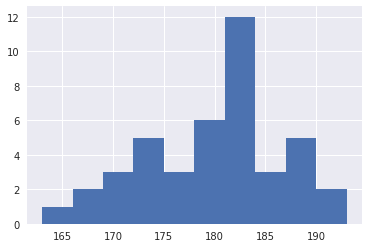

In [21]:
plt.hist(heights)
# plt.title('Height Distribution of US Presidents')
# plt.xlabel('height (cm)')
# plt.ylabel('number');